In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import statistics

In [2]:
def laserReflectionParabola(facent,rotatingR,Laserdist, ConcaveC, display):
    # Rotating Mirror Parameters
    N = facent # number of mirror faces
    R = rotatingR # raduis of rotating mirror
    theta = 2*math.pi/N
    theta2 = np.arange(math.pi, math.pi+2*math.pi/N, 0.01)
    ctheta = np.arange(0, 2*math.pi, 2*math.pi/N)


    # Plot the Rotating mirror
    x1 = R*np.cos(theta2)
    y1 = R*np.sin(theta2) 
    x2 = R*np.cos(theta + theta2) 
    y2 = R*np.sin(theta + theta2) 
    xA = R*np.cos(ctheta)
    yA = R*np.sin(ctheta)

    for i in range(0,len(x1)):
        k1 = [x1[i], x2[i]]
        k2 = [y1[i], y2[i]]

    y = Laserdist
    x_laserPoint = []

    for i in range(0, len(x1)):
        slope_Mirror = (y2[i]-y1[i])/(x2[i]-x1[i])
        slope_distance =   y1[i] - slope_Mirror*x1[i]
        x_simulate = (-2-slope_distance)/slope_Mirror
        if x_simulate > x1[i]:
            x_laserPoint.append(x_simulate)
        
    glassMid = [statistics.mean(x_laserPoint), y]


    # Concave Mirror Parameters
    c = ConcaveC
    xR = np.arange(-19.5, 0, 0.1)
    yR = (1/(4*c))*(xR**2)
    pR = [1/(4*c), 0]

    # Plot the concave mirror
    xRT = xR - abs(glassMid[0])
    yRT = yR - abs(c - glassMid[1])

    # 求出兩直線交角 (cthe)
    # 並求出反射後線段點位(xthe, ythe)

    cthe = []
    xthe = []
    ythe = []

    for i in range(0, len(x_laserPoint)):
        kkl = np.array([1, 0]).reshape(1, 2)
        kk2 = np.array([(x2[i]-x1[i]), (y2[i]-y1[i])]).reshape(1, 2)
        kklT = kkl.transpose()
        uu = np.dot(kk2, kklT)
        uuAll = uu/((np.linalg.norm(kklT))*(np.linalg.norm(kk2)))
        # cthe.append(math.acos(uuAll)*180/math.pi)

        # 求出兩直線交角 (cthe)
        cthe.append(math.acos(uuAll))

        # 並求出反射後線段點位(xthe, ythe)
        xthe.append((x_laserPoint[i] - math.cos(math.pi - 2*cthe[i])))
        ythe.append((y - math.sin(math.pi - 2*cthe[i])))


    # 求出反射後線段 (slope_1stReflect)

    slope_1stReflect = []
    slope_1stReflectdistance = []

    for i in range(0, len(xthe)):
        # 求出反射後線段 (slope_1stReflect)ㄇ
        slope_1st = (y-ythe[i])/(x_laserPoint[i]-xthe[i])
        slope_1stdistance =   y - slope_1st*x_laserPoint[i]
        slope_1stReflect.append(slope_1st)
        slope_1stReflectdistance.append(slope_1stdistance)


    # slope_1stReflectN = list([a for a in slope_1stReflect if a <4.75])

    slope_1stReflectN = []
    slope_1stReflectdistanceN = []
    ctheN = []
    xtheN = []
    ytheN = []
    x_laserPointN = []
    for i in range(0, len(slope_1stReflect)):
        if slope_1stReflect[i] <4.75 :
            slope_1stReflectN.append(slope_1stReflect[i])
            slope_1stReflectdistanceN.append(slope_1stReflectdistance[i])
            ctheN.append(cthe[i])
            xtheN.append(xthe[i])
            ytheN.append(ythe[i])
            x_laserPointN.append(x_laserPoint[i])

    # Caculate the reflecting Points on concave mirror
    xtry = np.arange(xRT.max(), xRT.min(), -0.1)
    xc = []
    yc = []  
    for i in range(0, len(xtheN)):
        k = 0
        yTry = Laserdist 
        yCon = min(yRT)

        xcc = []
        ycc = []
        while  yTry >= yCon:
            if k <= len(xtry)-1:
                # Reflecting Line Y Point 
                fitTry = np.polyfit([xtheN[i], x_laserPointN[i]], [ytheN[i], -2], 1)
                line = np.poly1d(fitTry)
                yTry = line(xtry[k])

                # Concave Y points
                yCon = pR[0]*(xtry[k]+abs(glassMid[0]))**2 - abs(c - glassMid[1])
                # fitCon = np.polyfit(xRT, yRT, 1)
                # lineC = np.poly1d(fitCon)
                # yCon = lineC(xtry[k])
                k +=1
            else: 
                break

        if k <= len(xtry)-1:
            xcc.append(xtry[k-1])
            ycc.append(pR[0]*(xtry[k-1]+abs(glassMid[0]))**2 - abs(c - glassMid[1]))
        else:
            xcc = []
            ycc = []
        
        for i in range(0, len(xcc)):
            if xcc[i] < -R:
                xc.append(xcc[i])
                yc.append(ycc[i])
            
    if xc == []:
        ReflectingRange = math.nan
        return ReflectingRange
    
    # 計算反射點在凹面鏡上焦點的斜率
    # 求出第二次反射線上點位
    slope_Conacave = []
    cthe2 = []
    xthe2 = []
    ythe2 = []
    for i in range(0, len(xc)):
        xT = xc[i] + abs(glassMid[0])
        slope_Conacave.append(2*pR[0]*xT)
        kk3 = np.array([1, slope_1stReflectN[i]]).reshape(1, 2)
        kk4 = np.array([1, slope_Conacave[i]]).reshape(1, 2)

        kk3T = kkl.transpose()
        uu2 = np.dot(kk4, kk3T)
        uuAll2 = uu2/((np.linalg.norm(kk3T))*(np.linalg.norm(kk4)))
        # cthe.append(math.acos(uuAll)*180/math.pi)

        # 求出兩直線交角 (cthe2) & 反射點位 (xthe2 ythe2)
        cthe2.append(math.acos(uuAll2))
        xthe2.append((xc[i] + math.cos(math.pi + 2*cthe2[i] - 2*ctheN[i])))
        ythe2.append((yc[i] + math.sin(math.pi + 2*cthe2[i] - 2*ctheN[i])))

    # 求出第二次反射線段方程式
    for i in range(0, len(xthe2)):
        # slopes of 2nd reflecting lines 
        fit2ndLine = np.polyfit([xc[i], xthe2[i]], [yc[i], ythe2[i]], 1)
        line2nd = np.poly1d(fit2ndLine)
        if fit2ndLine[0] < 0:
            x2ndline = np.arange(xRT.min(), xc[i], 0.1)    
            y2ndline = line2nd(x2ndline)
        else:
            x2ndline = np.arange(xc[i], xRT.max(), 0.1)    
            y2ndline = line2nd(x2ndline)
            
    
    # Reture Values
    ReflectingRange = abs(max(xc) - min(xc))
    return ReflectingRange

    # Plot the figure
    if display:
        fig, ax = plt.subplots(figsize=(12,10))
        
        # Plot the rotating face per 0.1 degree
        for i in range(0,len(x1)):
            ax.plot(k1, k2) # color=(1.0,0.2,0.3))
            ax.plot([x1[i], 0], [y1[i], 0], color=(0,i**0.5 /10,i**0.5 /10))
            ax.plot([0, x2[i]], [0, y2[i]], color=(0,(i**0.5)**0.9 /10, (i**(0.1)**0.9) /10))
    
        # Plot the rotating mirror frame
        for i in range(0,len(xA)):
            ax.plot([xA[i], 0], [yA[i], 0], color = 'black')
        ax.plot(np.append(xA, xA[0]),np.append(yA, yA[0]),color = 'black')    
        ax.axis('equal')
        ax.set_xlabel('X [cm]')
        ax.set_ylabel('Y [cm]')
        
        # Plot the laser points on mirror facent
        ax.plot(x_laserPoint, [y]*len(x_laserPoint), marker = 'o', mfc='none', color = 'blue')
        ax.axis('equal')
        
        # Plot the concave mirror
        ax.plot(xRT, yRT, '-', color = 'black')
        
        # Plot the 2nd reflecting points on concave mirror
        ax.plot(xc, yc, marker = 'o', mfc='none', color = 'gold')    
        
        # Plot lst reflecting Laser Lines 
        ax.plot([-25, glassMid[0]],[y, y], '-', color = 'red')
        for i in range(0, len(xc)):
            ax.plot([glassMid[0], xc[i]], [glassMid[1], yc[i]], '-', color = 'black')
        
        for i in range(0, len(xthe2)):
            fit2ndLine = np.polyfit([xc[i], xthe2[i]], [yc[i], ythe2[i]], 1)
            line2nd = np.poly1d(fit2ndLine)
            if fit2ndLine[0] < 0:
                x2ndline = np.arange(xRT.min()-5, xc[i], 0.1)    
                y2ndline = line2nd(x2ndline)
                ax.plot(x2ndline, y2ndline, '-', color = 'tomato')
            else:
                x2ndline = np.arange(xc[i], xRT.max(), 0.1)    
                y2ndline = line2nd(x2ndline)
                ax.plot(x2ndline, y2ndline, '-', color = 'tomato')
        
        ax.set_xlim([-25, 10])
        ax.set_ylim([-18, 10])
        
    fig
        

In [3]:
laserReflectionParabola(8, 5, -2, 15, 1)

8.899999999999967

In [30]:
facent = np.arange(8, 20, 4)
rotatingR = np.arange(4, 6.5, 0.5)
Laserdist = np.arange(-1.5, -2.6, -0.1)
ConcaveC =  15

# df = pd.DataFrame(index = ['facent', 'rotatingR', 'Laserdist', 'ConcaveC', 'ReflectingDist'])
d = []
for i in facent:
    for j in rotatingR:
        for k in Laserdist:
                caculatDist = laserReflectionParabola(i, j, k, ConcaveC, 0)
                d.append(
                    {
                        'facent' : i,
                        'rotatingR' : j,
                        'Laserdist' : k,
                        'ConcaveC' : ConcaveC,
                        'ReflectingDist' : caculatDist
                    }
                )

RotatingValues_df = pd.DataFrame(d)
print(RotatingValues_df)
RotatingValues_df.to_csv(r'C:\Users\Hsiu-Chuan Hsu\Desktop\RotatingMirror_Python\RotatingValues_df.csv', index = True, header=True)

     facent  rotatingR  Laserdist  ConcaveC  ReflectingDist
0         8        4.0       -1.5        15            12.8
1         8        4.0       -1.6        15            13.9
2         8        4.0       -1.7        15            12.4
3         8        4.0       -1.8        15            11.1
4         8        4.0       -1.9        15            10.0
..      ...        ...        ...       ...             ...
160      16        6.0       -2.1        15            10.9
161      16        6.0       -2.2        15            10.0
162      16        6.0       -2.3        15             9.1
163      16        6.0       -2.4        15             8.4
164      16        6.0       -2.5        15             7.7

[165 rows x 5 columns]


In [4]:
RotatingValues_df = pd.read_csv(r'C:\Users\Hsiu-Chuan Hsu\Desktop\RotatingMirror_Python\RotatingValues_df.csv', index_col=0)
joint_data = RotatingValues_df.sort_values( by = ['ReflectingDist'], ascending = False)
print(joint_data.head())

    facent  rotatingR  Laserdist  ConcaveC  ReflectingDist
59      12        4.0       -1.9        15            15.4
70      12        4.5       -1.9        15            15.3
81      12        5.0       -1.9        15            15.2
58      12        4.0       -1.8        15            15.1
69      12        4.5       -1.8        15            15.0


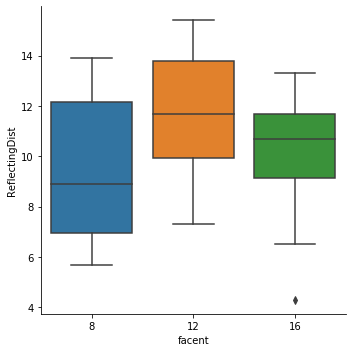

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.catplot(x = 'facent', y = 'ReflectingDist', data = RotatingValues_df, kind = 'box')
plt.show()

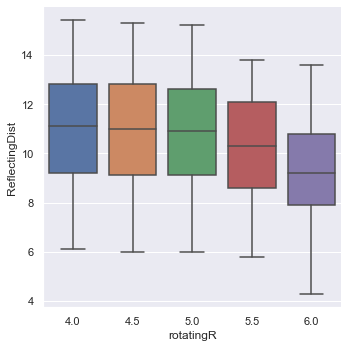

In [60]:
g = sns.catplot(x = 'rotatingR', y = 'ReflectingDist', data = RotatingValues_df, kind = 'box')
plt.show()

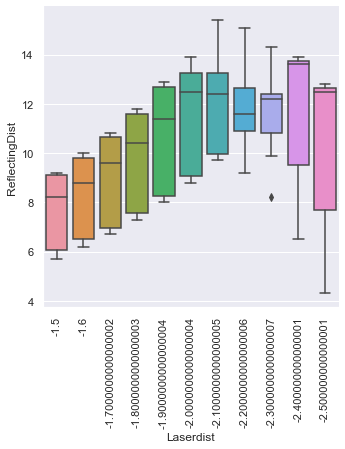

In [59]:
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
import matplotlib.pyplot as plt


g = sns.catplot(x = 'Laserdist', y = 'ReflectingDist', data = RotatingValues_df, kind = 'box')
g.set_xticklabels(rotation=90)
g.set_xticklabels(np.arange(-1.5, -2.6, -0.1))
plt.show()

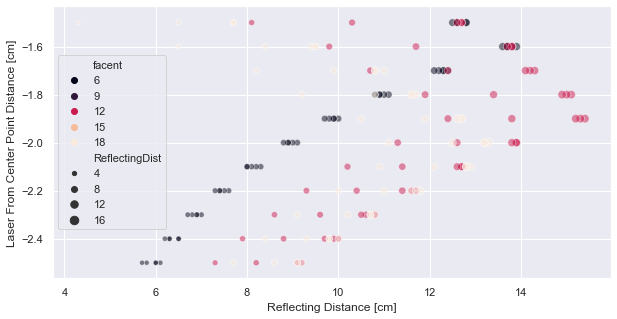

In [35]:
plt.figure(figsize = (10,5))
# sns.set(style = 'darkgrid')
sns.scatterplot(x = 'ReflectingDist', y = 'Laserdist', data = RotatingValues_df,size = 'ReflectingDist', hue = 'facent', alpha=.5, palette = 'rocket')
# gScatter.fig_set_inches(15,10)
plt.axis('tight')
plt.xlabel('Reflecting Distance [cm]')
plt.ylabel('Laser From Center Point Distance [cm]')
plt.show()

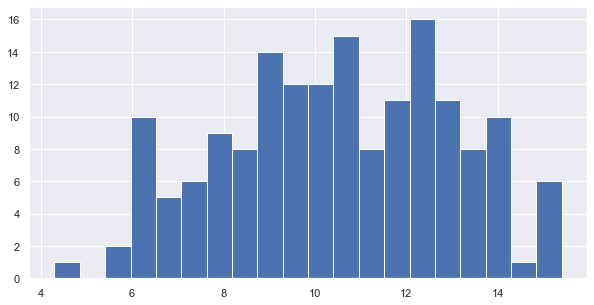

In [40]:
plt.figure(figsize = (10,5))
plt.hist(RotatingValues_df['ReflectingDist'], bins = 20)
plt.show()

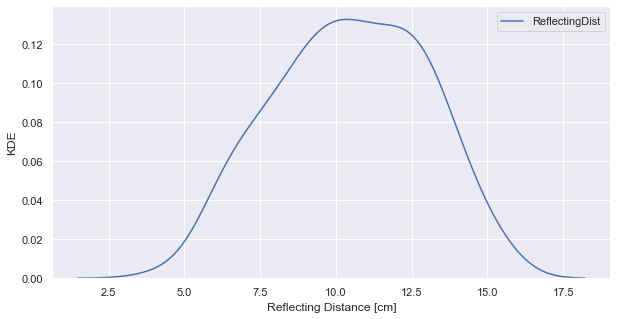

In [45]:
plt.figure(figsize = (10,5))
sns.kdeplot(RotatingValues_df['ReflectingDist'])
plt.xlabel('Reflecting Distance [cm]')
plt.ylabel('KDE')
plt.show()